<ipython-input-15-9b5183a4a8e3>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Item Total"] = df["Item Total"].str.replace('$','').astype(float)
C:\Users\Shafin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order Date', ylabel='Item Total'>

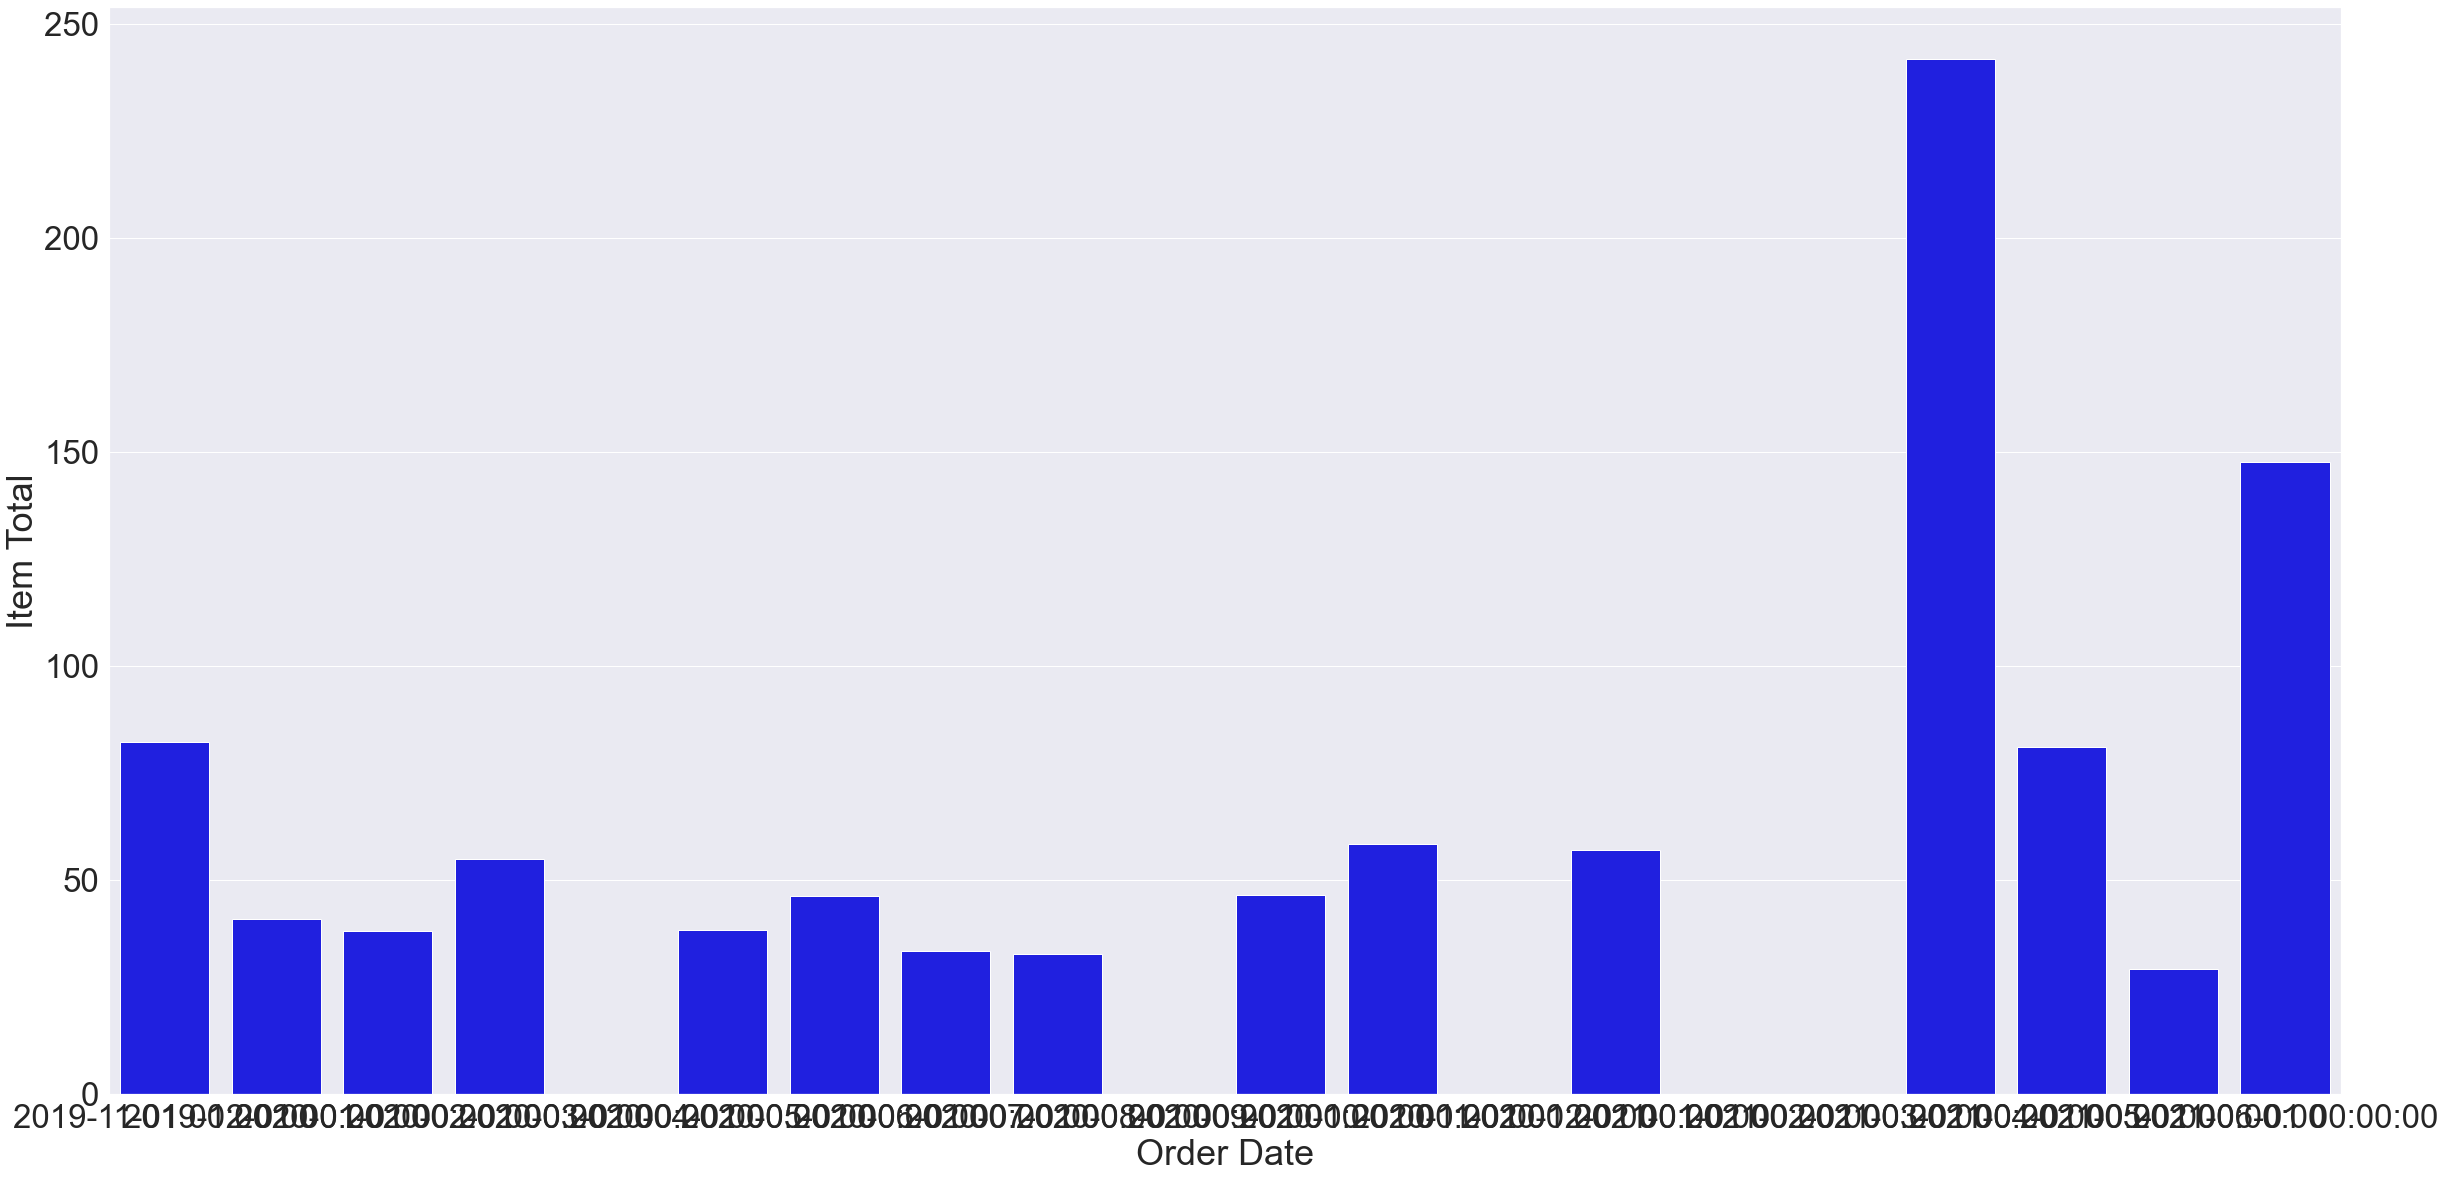

In [15]:
import pandas as pd

df = pd.read_csv('C:/Users/Shafin/Desktop/silky-2021/study/python/report_amazon.csv')
df.head(3)

df["Item Total"] = df["Item Total"].str.replace('$','').astype(float)
df.head()

df["Item Total"].mean()

#------Analyzing Amazon Spending Over Time---------------
# change date from 2019/04/01 to 2019-04-01
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()
#plot it
df.plot.bar(x='Order Date', y='Item Total', rot=90, figsize=(20,10))

daily_orders = df.groupby('Order Date').sum()["Item Total"]
daily_orders.head()
daily_orders.plot.bar(figsize=(20,10))

#------Break your spending down by month, or year, instead of day---------------
#Use DatetimeIndex.month attribute to find the month
df['month'] = pd.DatetimeIndex(df['Order Date']).month
df.head(1)
monthly_orders = df.groupby('month').sum()["Item Total"]
monthly_orders.plot.bar(figsize=(20,10))

#Use DatetimeIndex.year attribute to find the year
df['year'] = pd.DatetimeIndex(df['Order Date']).year
df.head(1)
yearly_orders = df.groupby('year').sum()["Item Total"]
yearly_orders.plot.bar(figsize=(20,10))

#--------Find a way to get every day (even days with no orders) into your data set so that you can more easily visualize your spending over time-----
df = df.set_index('Order Date')
post_counts = df['Item Total'].resample('MS').sum()
post_counts

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")
